In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
# import dataset
df = pd.read_csv('../Without Feature Selection/UFC_clustering.csv')
df.head()

,R_fighter,B_fighter,location,weight_class,B_Stance,R_Stance,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
0,Jorge Masvidal,Al Iaquinta,"Fairfax, Virginia, USA",5,Orthodox,Orthodox,Blue,0.768371,0.000000,0.332278,...,1.609438,0.000000,0.693147,0.000000,5.817944,5.832938,5.655992,3.871201,3.912023,1
1,Josh Koscheck,Johny Hendricks,"East Rutherford, New Jersey, USA",6,Southpaw,Orthodox,Blue,0.527867,0.000000,0.578499,...,1.791759,1.945910,1.386294,0.000000,5.810362,5.825469,5.655992,3.891820,3.988984,1
2,John Dodson,Manvel Gamburyan,"Tampa, Florida, USA",3,Orthodox,Orthodox,Red,0.405465,0.236337,0.323143,...,1.098612,1.386294,0.000000,0.693147,5.755616,5.771566,5.525453,4.007333,3.931826,1
3,Tony Ferguson,Katsunori Kikuno,"Las Vegas, Nevada, USA",5,Orthodox,Orthodox,Red,0.000000,0.000000,0.385262,...,0.693147,0.693147,0.693147,0.693147,5.817944,5.847710,5.602119,3.970292,3.912023,1
4,Richard Walsh,Viscardi Andrade,"Brisbane, Queensland, Australia",6,Orthodox,Orthodox,Blue,0.405465,0.000000,0.378436,...,1.098612,0.000000,0.000000,0.000000,5.825469,5.825469,5.655992,3.970292,3.850148,1


In [4]:
features_to_keep = ["B_age", "B_Reach_cms", "B_Weight_lbs", "B_Height_cms", "R_age", "R_Reach_cms", "R_Weight_lbs", "R_Height_cms"]

df_cluster3 = df[features_to_keep]

df_cluster3.head()

,B_age,B_Reach_cms,B_Weight_lbs,B_Height_cms,R_age,R_Reach_cms,R_Weight_lbs,R_Height_cms
0,3.871201,5.802722,5.602119,5.802722,3.912023,5.832938,5.655992,5.817944
1,3.891820,5.795024,5.707110,5.795024,3.988984,5.825469,5.655992,5.810362
2,4.007333,5.779446,5.525453,5.763622,3.931826,5.771566,5.525453,5.755616
3,3.970292,5.771566,5.564520,5.787265,3.912023,5.847710,5.602119,5.817944
4,3.970292,5.840351,5.655992,5.810362,3.850148,5.825469,5.655992,5.825469


In [5]:
df = df.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df[['B_fighter', "B_age", "B_Reach_cms", "B_Weight_lbs", "B_Height_cms"]]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df[['R_fighter', "R_age", "R_Reach_cms", "R_Weight_lbs", "R_Height_cms"]]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,age,Reach_cms,Weight_lbs,Height_cms
0,Al Iaquinta,3.871201,5.802722,5.602119,5.802722
1,Johny Hendricks,3.891820,5.795024,5.707110,5.795024
2,Manvel Gamburyan,4.007333,5.779446,5.525453,5.763622
3,Katsunori Kikuno,3.970292,5.771566,5.564520,5.787265
4,Viscardi Andrade,3.970292,5.840351,5.655992,5.810362


In [6]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
age,6042.0,3.923599,0.078824,3.663562,3.871201,3.931826,3.970292,4.219508
Reach_cms,6042.0,5.818103,0.031873,5.722931,5.802722,5.817944,5.840351,5.904708
Weight_lbs,6042.0,5.637870,0.118179,5.442418,5.564520,5.602119,5.707110,5.942799
Height_cms,6042.0,5.807980,0.027026,5.722931,5.787265,5.810362,5.825469,5.904708


In [7]:
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [9]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [10]:
outliers = dict(check_outlier(df_fighter[1:]).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/df_fighter[1:][key].shape[0] * 100}%")

Outlier pada tiap atribut:
Height_cms     3
Reach_cms      2
Weight_lbs     0
age           11
fighter        0
dtype: int64


percentage of outliers in each column:
Height_cms = 0.24%
Reach_cms = 0.16%
Weight_lbs = 0.0%
age = 0.88%
fighter = 0.0%


/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_17533/3859787923.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [11]:
# Drop outliers in x y z columns
def drop_outliers(df, column_name):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_filtered

In [12]:
columns_to_drop_outliers = ['age', 'Reach_cms', 'Weight_lbs', 'Height_cms']

for c in columns_to_drop_outliers:
    df_fighter = drop_outliers(df_fighter, c)

df_fighter.shape

(1236, 5)

In [13]:
outliers = dict(check_outlier(df_fighter[1:]).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/df_fighter[1:][key].shape[0] * 100}%")

Outlier pada tiap atribut:
Height_cms    0
Reach_cms     0
Weight_lbs    0
age           0
fighter       0
dtype: int64


percentage of outliers in each column:
Height_cms = 0.0%
Reach_cms = 0.0%
Weight_lbs = 0.0%
age = 0.0%
fighter = 0.0%


/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_17533/3859787923.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [14]:
# Drop duplicates
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [15]:
# Reindex
df_fighter.reset_index(drop=True, inplace=True)

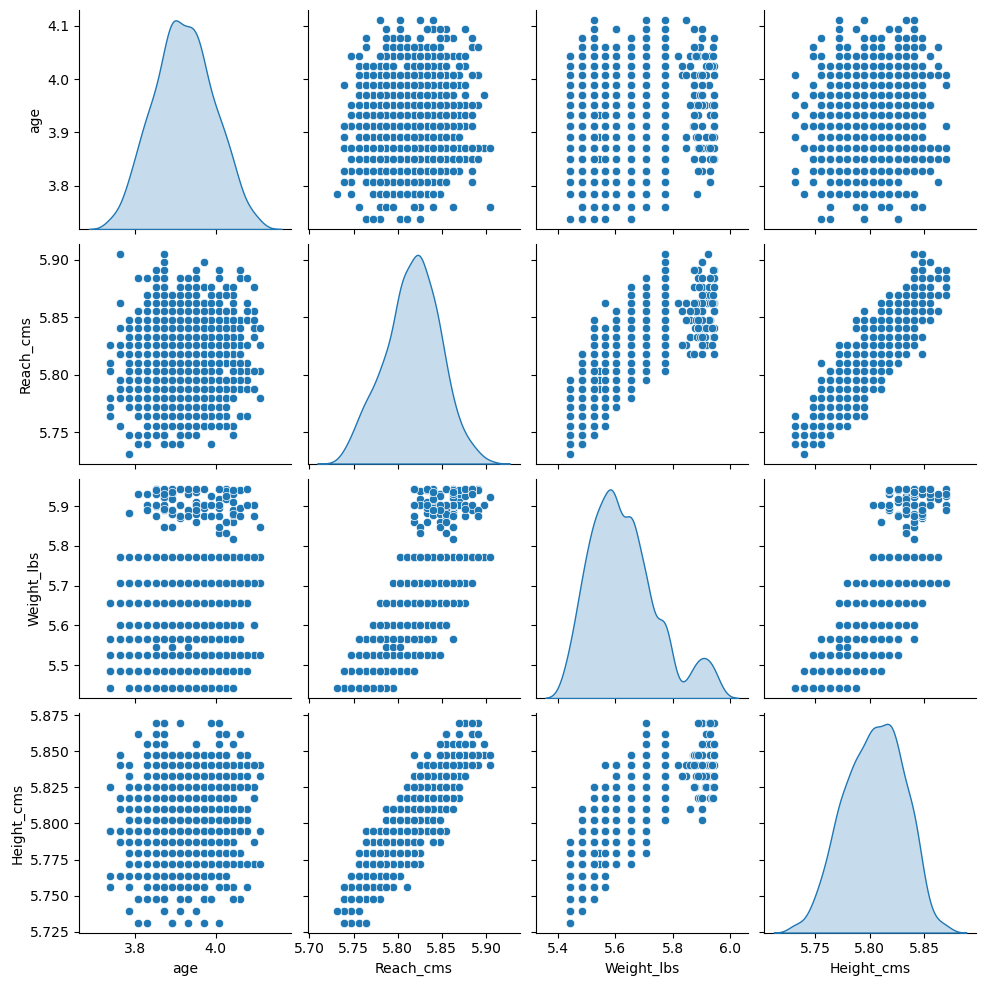

In [16]:
#Pairplot
sns.pairplot(df_fighter, diag_kind='kde')
plt.show()

Dapat dilihat dari pairplot ini, semua fitur tidak terlalu distnguishable kecuali Weight_lbs. Dapat dilihat dari kdeplot Weight_lbs terdapat dua puncak, namun tidak demikian untuk fitur-fitur lainnya. Dari pairplot ini, kemungkinan subset fitur tidak cocok untuk dilakukan clustering

In [17]:
# Standardize features
scaler = StandardScaler()
df_fighter_scaled = df_fighter.drop(columns=['fighter'])
df_fighter_scaled = scaler.fit_transform(df_fighter_scaled)

# Combine with fighter column
df_fighter_scaled = pd.DataFrame(df_fighter_scaled, columns=df_fighter.drop(columns=['fighter']).columns)


In [19]:
from sklearn.decomposition import PCA

# PCA to two components
pca = PCA(n_components=2)
df_fighter_pca = pca.fit_transform(df_fighter_scaled)

# Create a new dataframe with the PCA scores
df_fighter_pca = pd.DataFrame(df_fighter_pca, columns=['PC1', 'PC2'])

df_fighter_pca.head()

,PC1,PC2
0,-0.490443,-0.601508
1,-0.260296,-0.236801
2,-1.922553,1.453258
3,-1.423709,0.894680
4,0.795557,0.554551


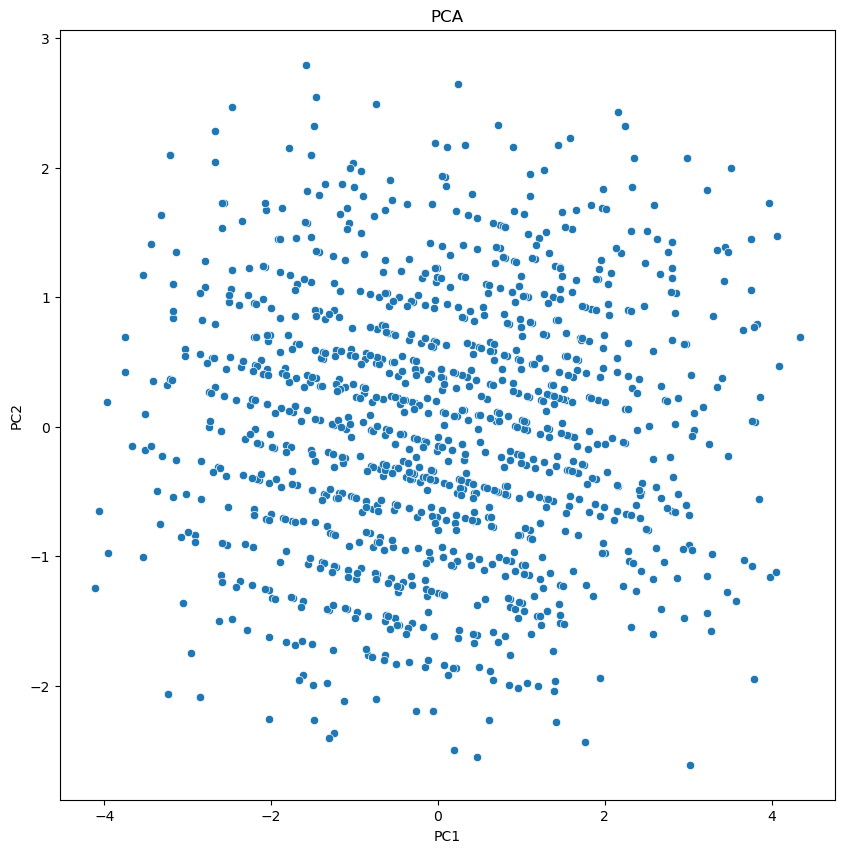

In [20]:
# Plot PCA
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2')
plt.title("PCA")
plt.show()

Dari plot ini, distinguishable clusters belum terlalu kelihatan. Mengutip dari https://towardsdatascience.com/when-clustering-doesnt-make-sense-c6ed9a89e9e6, data yang membentuk central grouping yang dense seperti plot di atas, clustering mungkin tidak cocok untuk dilakukan. Untuk sekarang, kita coba lakukan clustering dan k-means dan akan diselidiki apakah data ini benar-benar tidak cocok untuk dilakukan clustering.

In [21]:
# Import KMeans
from sklearn.cluster import KMeans

clustering_scores = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_fighter_scaled)
    clustering_scores.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.


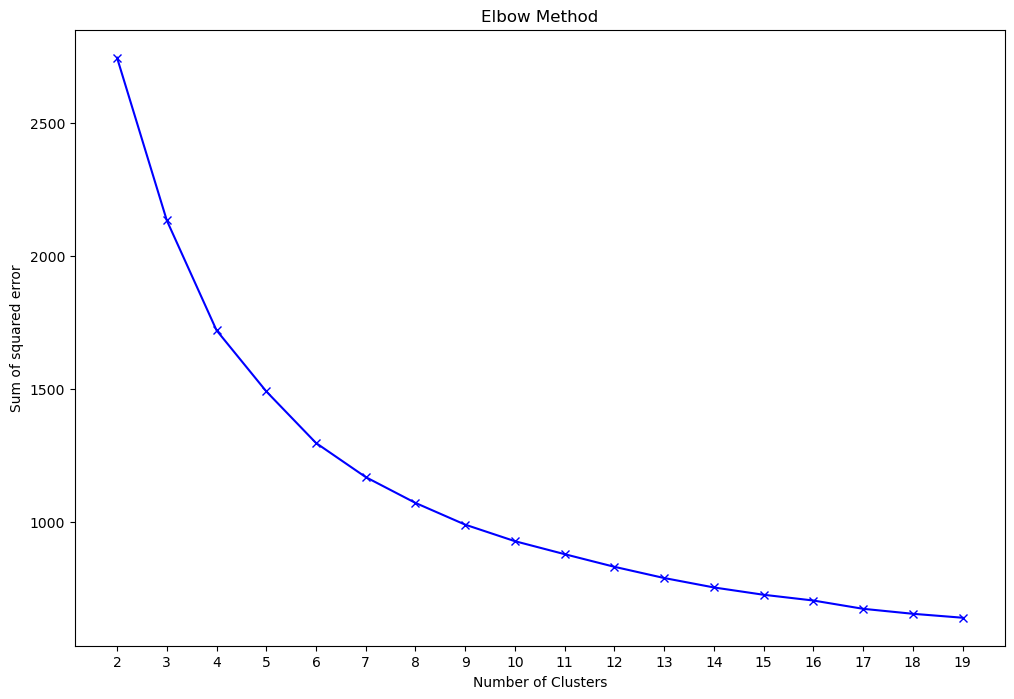

In [22]:
# Plotting Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(range(2, 20), clustering_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')
plt.xticks(range(2, 20))
plt.show()

For n_clusters = 2 The average silhouette_coefficient is : 0.3644607155077832
For n_clusters = 3 The average silhouette_coefficient is : 0.2829939787779653
For n_clusters = 4 The average silhouette_coefficient is : 0.2884571568260623
For n_clusters = 5 The average silhouette_coefficient is : 0.26848656802713583
For n_clusters = 6 The average silhouette_coefficient is : 0.2655468149143559
For n_clusters = 7 The average silhouette_coefficient is : 0.25679851478853805
For n_clusters = 8 The average silhouette_coefficient is : 0.25286664836229633
For n_clusters = 9 The average silhouette_coefficient is : 0.24870758038553897
For n_clusters = 10 The average silhouette_coefficient is : 0.24144802643261754
For n_clusters = 11 The average silhouette_coefficient is : 0.23752146667740884
For n_clusters = 12 The average silhouette_coefficient is : 0.2352767107796761
For n_clusters = 13 The average silhouette_coefficient is : 0.23563348754728877
For n_clusters = 14 The average silhouette_coefficien

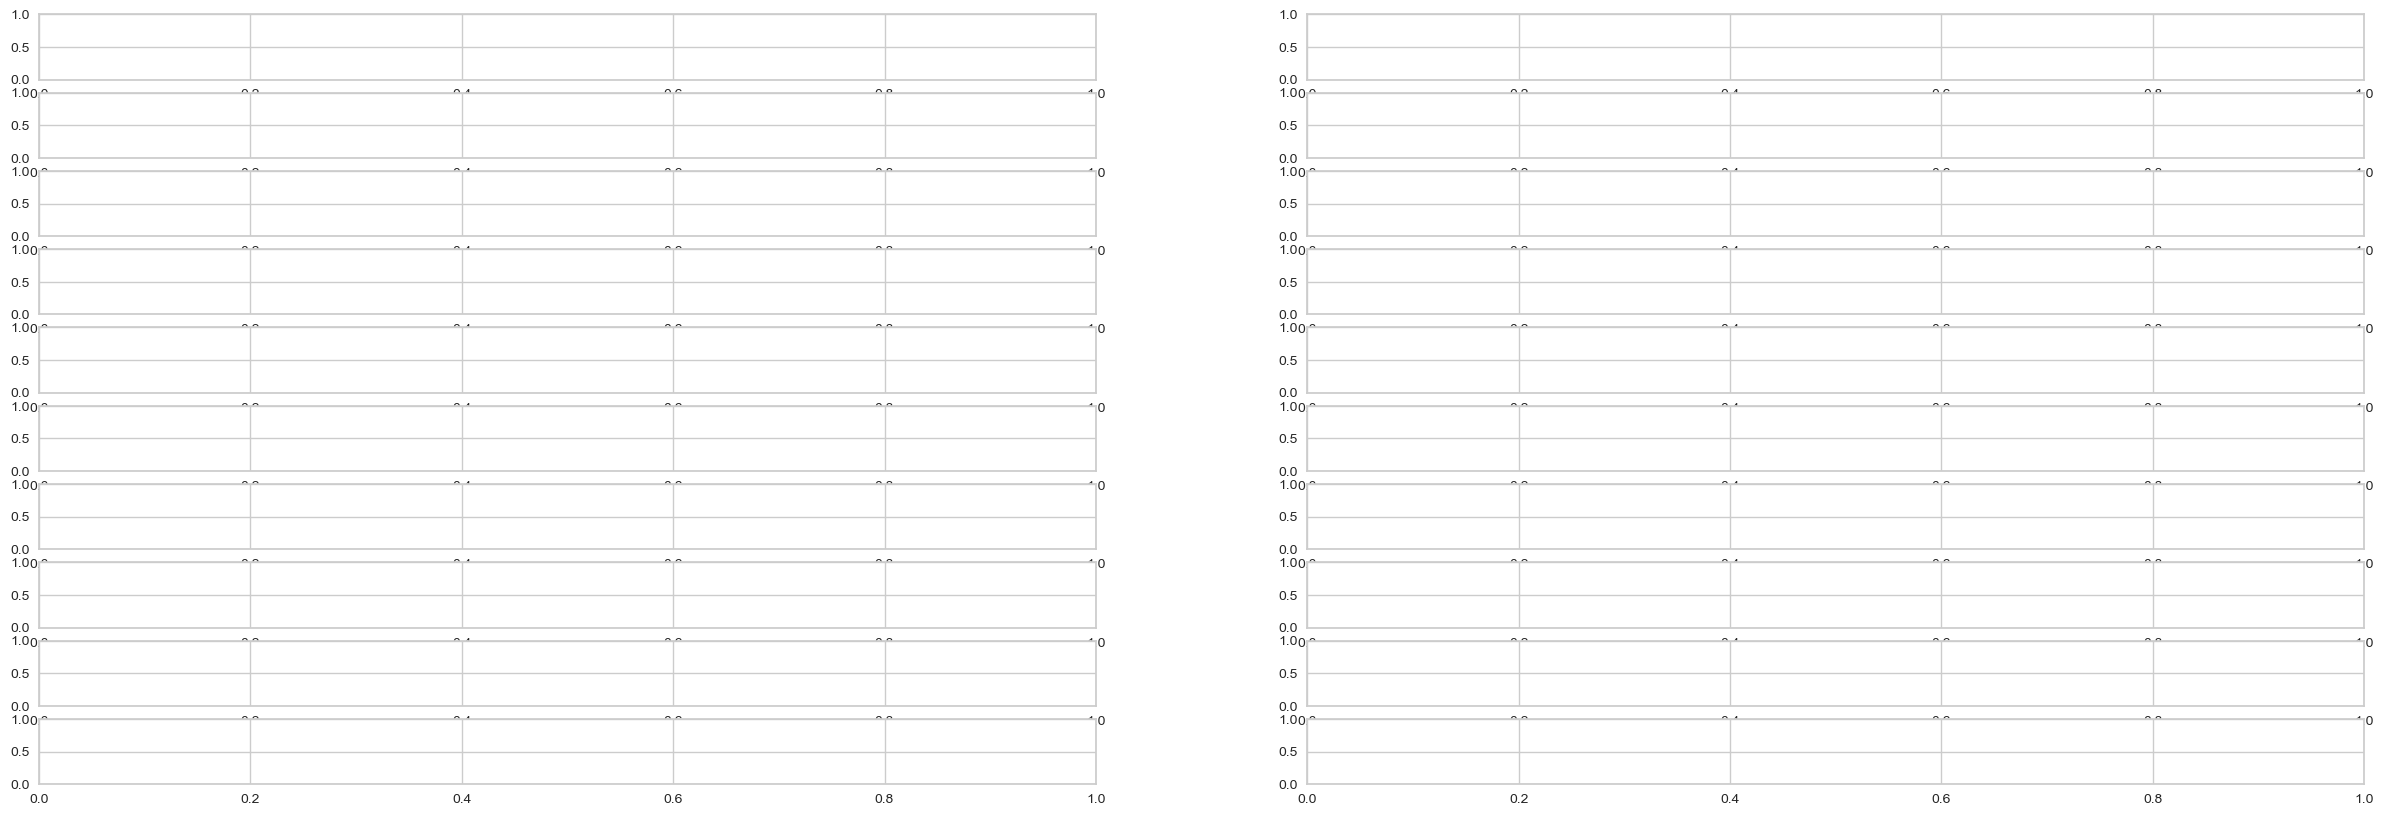

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

num_of_cluster = [i for i in range(2, 20)]

silhouette_avg_list = []

fig, ax = plt.subplots(10, 2, figsize=(30,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10, random_state=42)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_fighter_scaled)
    silhouette_avg = silhouette_score(df_fighter_scaled, cluster_labels)
    silhouette_avg_list.append((k, silhouette_avg))
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

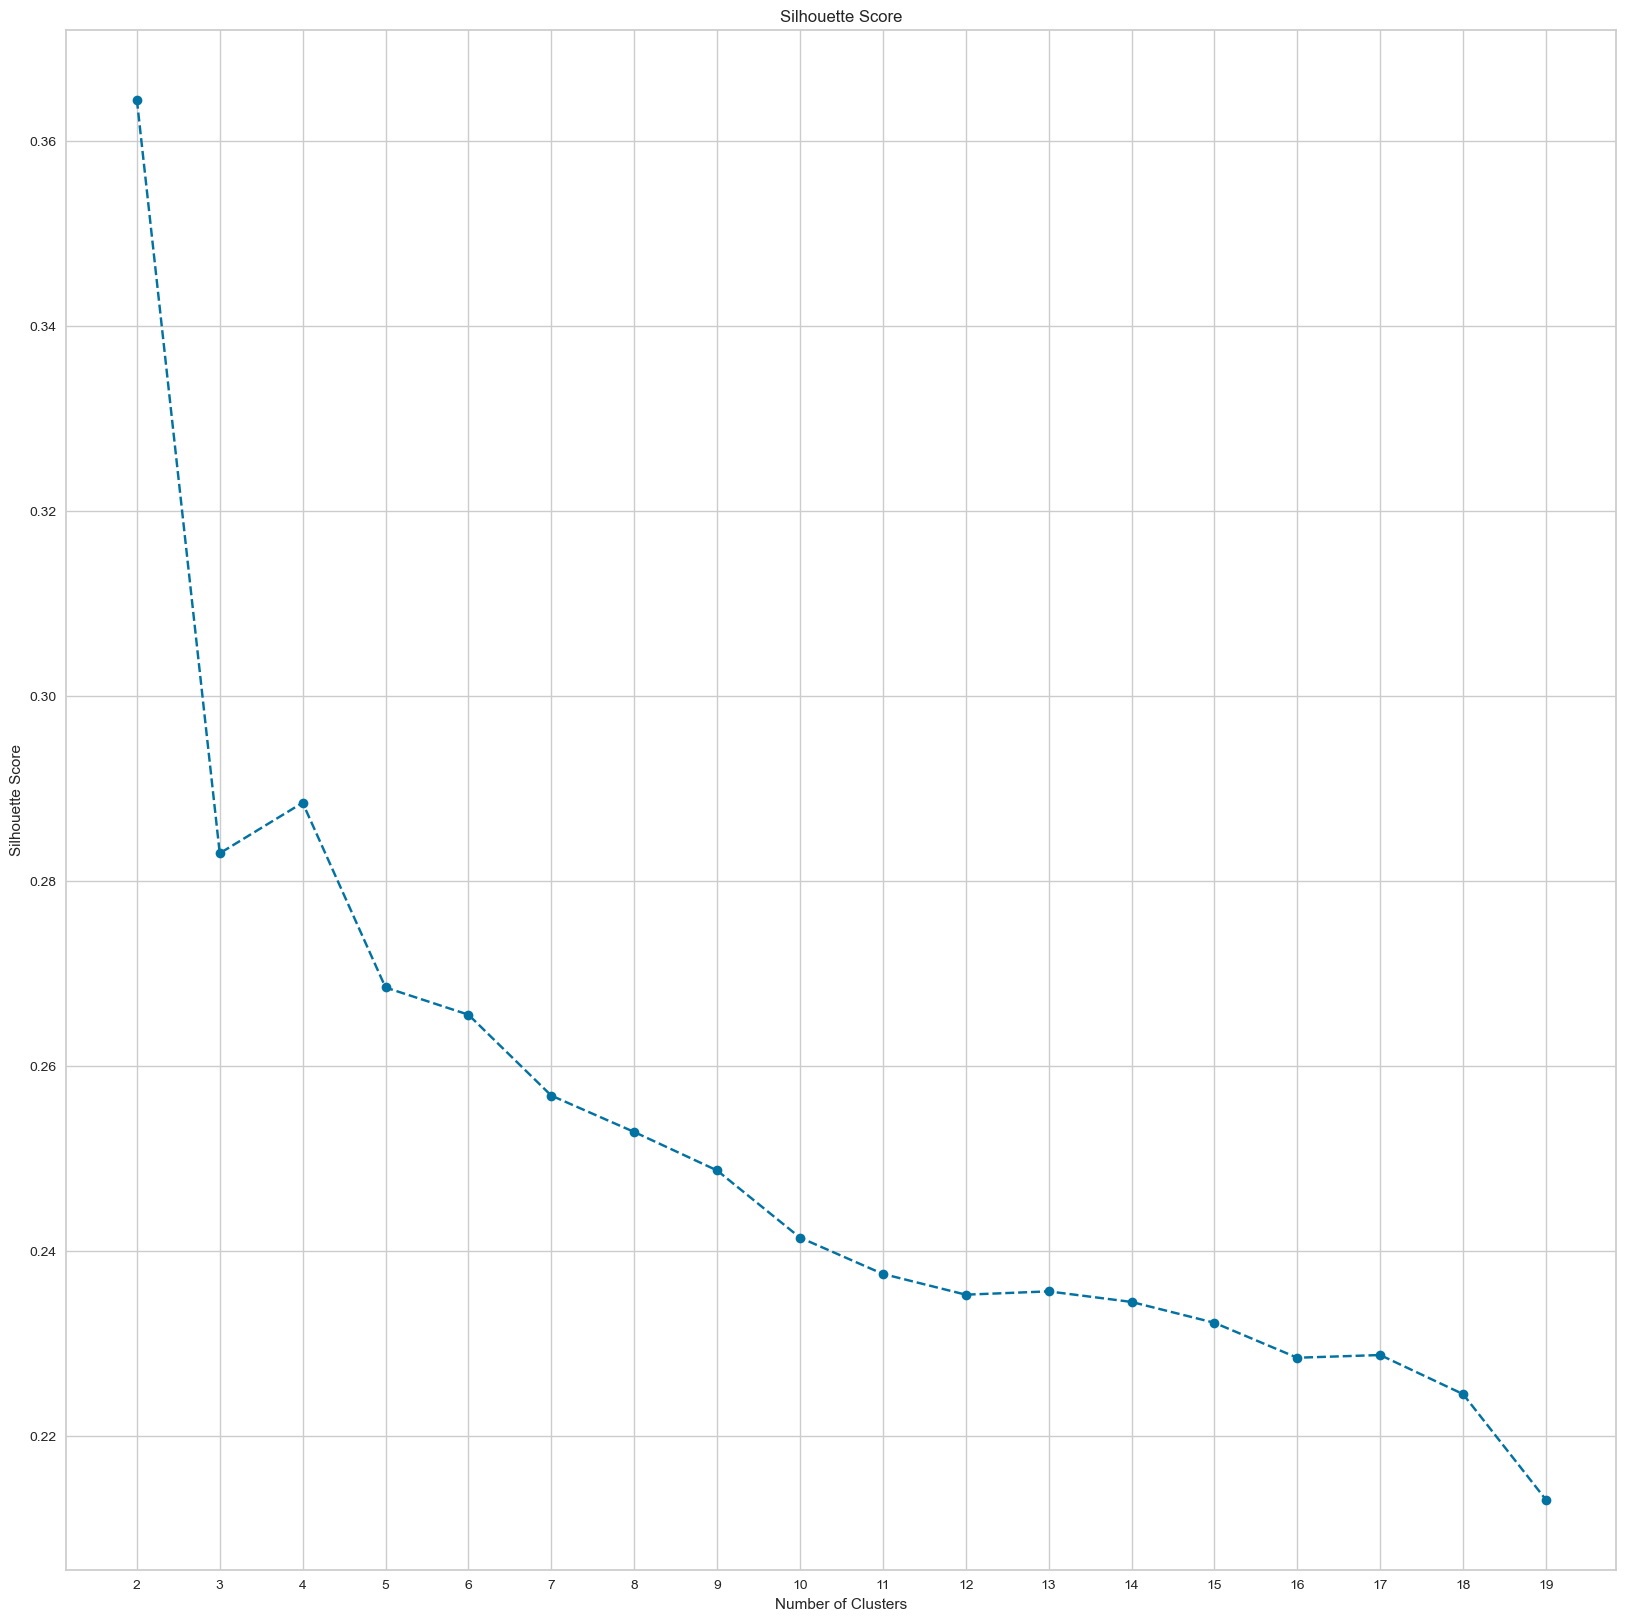

In [24]:
plt.figure(figsize=(20, 20))
plt.plot(*zip(*silhouette_avg_list), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 20))
plt.title('Silhouette Score')

plt.show()

Dapat dilihat dari plot bahwa nilai tertinggi silhouette score terletak di K=2. Untuk sekarang, mari gunakan DBSCAN untuk menentukan banyaknya cluster 

In [25]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=3,min_samples=4,metric='euclidean')

db.fit(df_fighter_scaled)

DBSCAN(eps=3, min_samples=4)

In [26]:
label=db.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


In [28]:
df_fighter_pca['cluster'] = label

df_fighter_pca.head()

,PC1,PC2,cluster
0,-0.490443,-0.601508,0
1,-0.260296,-0.236801,0
2,-1.922553,1.453258,0
3,-1.423709,0.894680,0
4,0.795557,0.554551,0


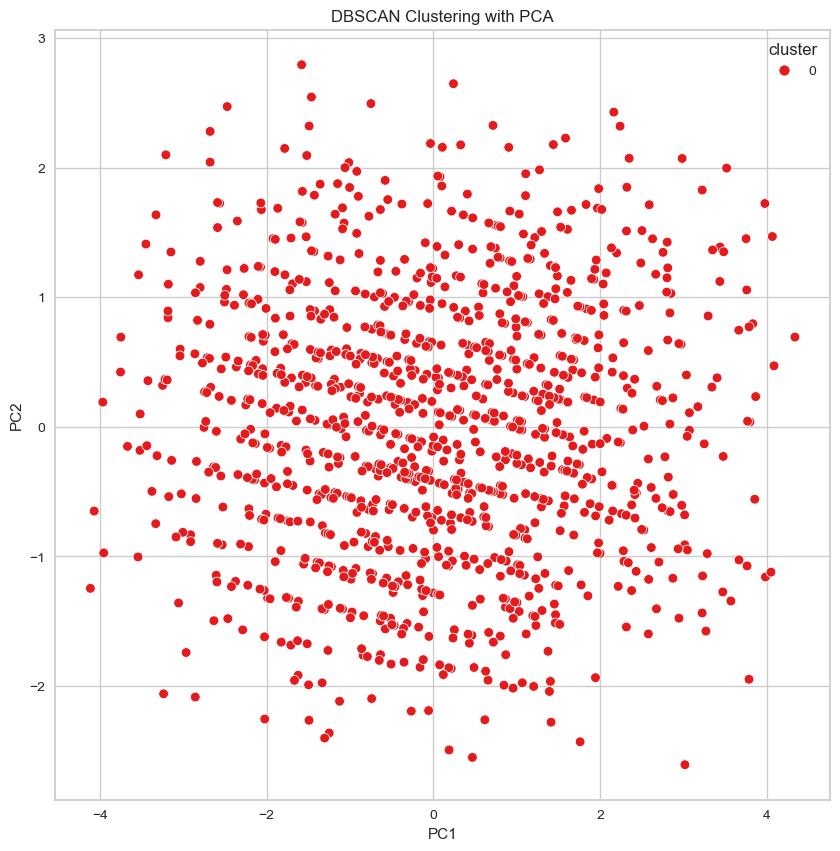

In [29]:
# Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title("DBSCAN Clustering with PCA")
plt.show()

Dari hasil DBSCAN, dapat disimpulkan bahwa untuk subset fitur yang digunakan tidak cocok untuk dilakukan clustering karena untuk subset fitur ini hanya membentuk satu cluster yang densitasnya terpusat di tengah.